In [2]:
import os
import json
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# import data from data-csv
keypoint_df = pd.read_csv('./keypoints_scaled.csv', index_col=0)
keypoint_df

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,pose
9d35b197b9a1d16ace8ad78e029929c1b2318222246a507a4104f2bdfe7be593.jpeg,0.474185,0.991736,0.502717,0.925620,0.459239,0.876033,0.567935,0.991736,0.569293,1.000000,...,0.000000,0.232337,0.504133,0.788043,0.785124,1.000000,0.595042,0.000000,0.537190,upavistha-konasana
4edf80754f1d14ee74f710415f5ac14fe5e34c4bf76744ee0f1209e8f8d74a87.jpeg,0.518900,0.038055,0.584192,0.000000,0.453608,0.000000,0.659794,0.014799,0.371134,0.016913,...,0.822410,1.000000,1.000000,0.000000,0.750528,0.663230,0.898520,0.340206,0.904863,upavistha-konasana
1ba53a97d5c6beafb1b00f8678175729320661ad0213c78391db1d079dd18212.jpeg,0.412500,0.089606,0.500000,0.000000,0.325000,0.003584,0.625000,0.003584,0.233333,0.014337,...,0.913978,1.000000,1.000000,0.029167,1.000000,0.858333,0.799283,0.270833,1.000000,upavistha-konasana
db951d1bea043360997c121705cdc4c66bac4c846b069ab764397a151d231ebb.jpeg,0.344578,0.112971,0.332530,0.066946,0.320482,0.085774,0.416868,0.008368,0.424096,0.000000,...,0.573222,0.809639,0.759414,0.787952,0.778243,0.561446,1.000000,0.551807,0.997908,upavistha-konasana
21f408b4f160a3c4420ccfa43690e0be4f75d00ecffc8adb818b6f13fb298bf4.jpeg,0.579955,0.061538,0.603604,0.000000,0.554054,0.000000,0.630631,0.015385,0.528153,0.018462,...,0.861538,0.865991,0.923077,0.244369,0.926154,0.006757,1.000000,0.000000,0.978462,upavistha-konasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c2bb23a739734d92eccefe1ae248759f32fa964d70120c46119236a1b8adee56.png,0.153453,0.514552,0.300512,0.207218,0.448849,0.000000,0.411765,0.302678,0.485933,0.074505,...,1.000000,0.335038,0.000000,0.336317,0.000000,0.355499,0.046566,0.340153,0.039581,eka-pada-rajakapotasana-ii
9598a4b961e7ed3b53f29e5ece7dccd1d43333465c72cbb54dbbef2d6d537761.png,0.786472,0.397942,0.746684,0.319039,0.750663,0.319039,0.144562,1.000000,0.037135,0.046312,...,0.675815,0.992042,0.463122,0.992042,0.459691,0.818302,0.890223,0.822281,0.888508,eka-pada-rajakapotasana-ii
9c4c81686c6592d3c3ba476b84eadce9e4ffbbb6d40d44fbda0be3d380c4c9e1.png,0.177199,0.258112,0.147460,0.435103,0.144981,0.238938,0.201983,0.306785,0.199504,0.309735,...,0.491150,0.578686,0.942478,0.376704,0.793510,1.000000,0.952802,0.586121,0.939528,eka-pada-rajakapotasana-ii
bb5a018e897cc4a897f0269941225b03734c0229540a4090bbbc47b2ed377690.png,0.157563,0.031405,0.180672,0.003306,0.173319,0.000000,0.243697,0.046281,0.262605,0.052893,...,0.816529,0.690126,0.990083,0.000000,0.928926,1.000000,0.996694,0.996849,1.000000,eka-pada-rajakapotasana-ii


In [5]:
# get unique poses
unique_poses = keypoint_df['pose'].unique()
unique_poses

array(['upavistha-konasana', 'urdhva-dhanurasana',
       'dwi-pada-viparita-dandasana', 'dhanurasana', 'ustrasana',
       'utkatasana', 'uttanasana', 'ardha-uttanasana',
       'utthita-hasta-padangustasana', 'utthita-hasta-padangusthasana',
       'utthita-parsvakonasana', 'utthita-trikonasana', 'vasisthasana',
       'vriksasana', 'vrksasana', 'virabhadrasana-i', 'virabhadrasana-ii',
       'virabhadrasana-iii', 'urdhva-mukha-svanasana',
       'adho-mukha-svanasana', 'adho-mukha-vriksasana',
       'adho-mukha-vrksasana', 'anjaneyasana', 'ardha-chandrasana',
       'ardha-matsyendrasana', 'ardha-pincha-mayurasana',
       'baddha-konasana', 'bakasana', 'balasana', 'bitilasana',
       'marjaryasana', 'chakravakasana', 'camatkarasana',
       'eka-pada-rajakapotasana', 'eka-pada-rajakapotasana-ii',
       'garudasana', 'halasana', 'paschimottanasana', 'malasana',
       'padmasana', 'phalakasana', 'chaturanga-dandasana',
       'salamba-bhujangasana', 'bhujangasana', 'salamba-sarva

In [6]:
# assign a number to each pose
pose_to_num = {pose: i for i, pose in enumerate(unique_poses)}
pose_to_num

{'upavistha-konasana': 0,
 'urdhva-dhanurasana': 1,
 'dwi-pada-viparita-dandasana': 2,
 'dhanurasana': 3,
 'ustrasana': 4,
 'utkatasana': 5,
 'uttanasana': 6,
 'ardha-uttanasana': 7,
 'utthita-hasta-padangustasana': 8,
 'utthita-hasta-padangusthasana': 9,
 'utthita-parsvakonasana': 10,
 'utthita-trikonasana': 11,
 'vasisthasana': 12,
 'vriksasana': 13,
 'vrksasana': 14,
 'virabhadrasana-i': 15,
 'virabhadrasana-ii': 16,
 'virabhadrasana-iii': 17,
 'urdhva-mukha-svanasana': 18,
 'adho-mukha-svanasana': 19,
 'adho-mukha-vriksasana': 20,
 'adho-mukha-vrksasana': 21,
 'anjaneyasana': 22,
 'ardha-chandrasana': 23,
 'ardha-matsyendrasana': 24,
 'ardha-pincha-mayurasana': 25,
 'baddha-konasana': 26,
 'bakasana': 27,
 'balasana': 28,
 'bitilasana': 29,
 'marjaryasana': 30,
 'chakravakasana': 31,
 'camatkarasana': 32,
 'eka-pada-rajakapotasana': 33,
 'eka-pada-rajakapotasana-ii': 34,
 'garudasana': 35,
 'halasana': 36,
 'paschimottanasana': 37,
 'malasana': 38,
 'padmasana': 39,
 'phalakasana':

In [7]:
# replace pose with number
keypoint_df['pose'] = keypoint_df['pose'].replace(pose_to_num)

In [8]:
# split data into train, validation and test
train, test = train_test_split(keypoint_df, test_size=0.2, random_state=42, stratify=keypoint_df['pose'])
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['pose'])

In [9]:
X_train = train.drop(['pose'], axis=1)
y_train = train['pose']
X_valid = valid.drop(['pose'], axis=1)
y_valid = valid['pose']

In [10]:
# run basic logression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

test_scores_log = []
train_scores_log = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    logreg = LogisticRegression(C=c, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    logreg.fit(X_train, y_train)
    train_scores_log.append(logreg.score(X_train, y_train))
    test_scores_log.append(logreg.score(X_valid, y_valid))

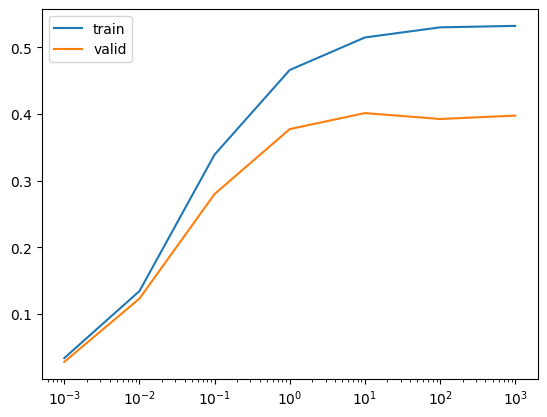

In [11]:
plt.plot(C_values, train_scores_log, label='train')
plt.plot(C_values, test_scores_log, label='valid')
plt.xscale('log')
plt.legend()
plt.show()


In [12]:
# run basic KNN model
from sklearn.neighbors import KNeighborsClassifier

test_scores_knn = []
train_scores_knn = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores_knn.append(knn.score(X_train, y_train))
    test_scores_knn.append(knn.score(X_valid, y_valid))

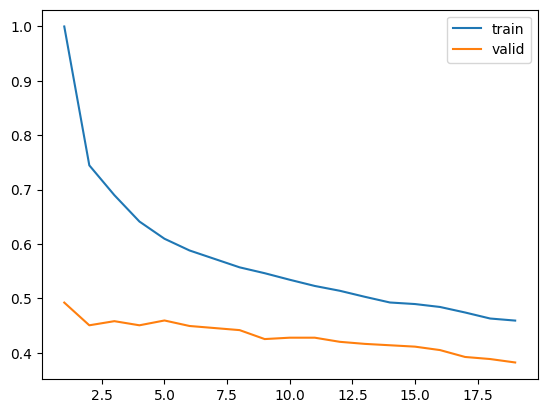

In [13]:
plt.plot(range(1, 20), train_scores_knn, label='train')
plt.plot(range(1, 20), test_scores_knn, label='valid')
plt.legend()

In [14]:
# run basic SVM model
from sklearn.svm import SVC

test_scores_svm = []
train_scores_svm = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    svm = SVC(C=c, gamma='auto')
    svm.fit(X_train, y_train)
    train_scores_svm.append(svm.score(X_train, y_train))
    test_scores_svm.append(svm.score(X_valid, y_valid))

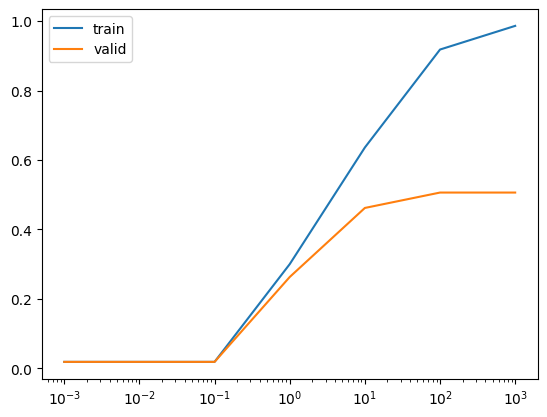

In [15]:
plt.plot(C_values, train_scores_svm, label='train')
plt.plot(C_values, test_scores_svm, label='valid')
plt.xscale('log')
plt.legend()
plt.show()

In [16]:
# run basic decision tree model
from sklearn.tree import DecisionTreeClassifier

test_scores_dt = []
train_scores_dt = []

for d in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    train_scores_dt.append(dt.score(X_train, y_train))
    test_scores_dt.append(dt.score(X_valid, y_valid))

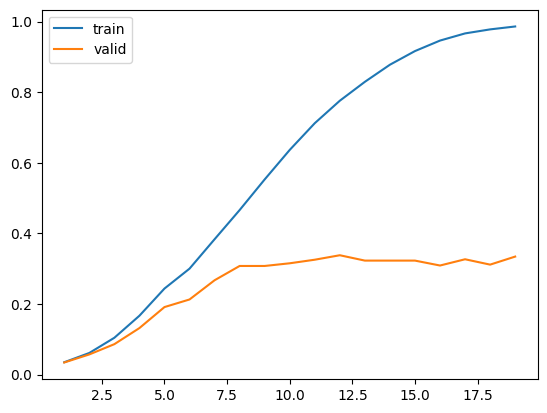

In [17]:
plt.plot(range(1, 20), train_scores_dt, label='train')
plt.plot(range(1, 20), test_scores_dt, label='valid')
plt.legend()
plt.show()

In [18]:
# run basic random forest model
from sklearn.ensemble import RandomForestClassifier

test_scores_rf = []
train_scores_rf = []

for d in range(1, 20):
    rf = RandomForestClassifier(max_depth=d)
    rf.fit(X_train, y_train)
    train_scores_rf.append(rf.score(X_train, y_train))
    test_scores_rf.append(rf.score(X_valid, y_valid))

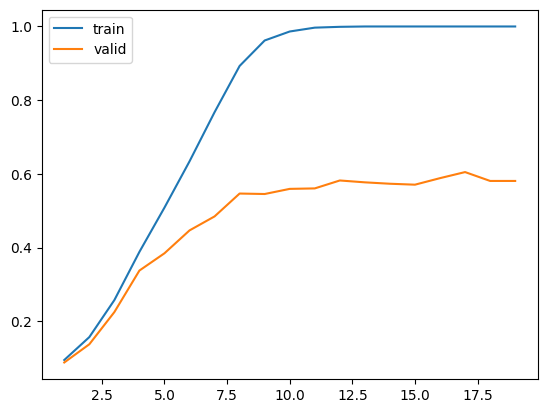

In [19]:
plt.plot(range(1, 20), train_scores_rf, label='train')
plt.plot(range(1, 20), test_scores_rf, label='valid')
plt.legend()
plt.show()

In [21]:
# run XGBoost model
from xgboost import XGBClassifier

test_scores_xgb = []
train_scores_xgb = []

for d in range(1, 20):
    xgb = XGBClassifier(max_depth=d)
    xgb.fit(X_train, y_train)
    train_scores_xgb.append(xgb.score(X_train, y_train))
    test_scores_xgb.append(xgb.score(X_valid, y_valid))

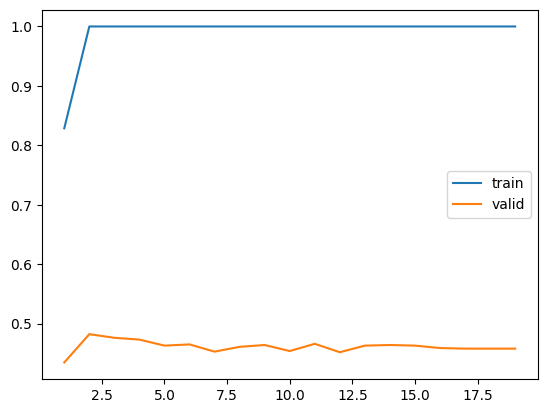

In [ ]:
plt.plot(range(1, 20), train_scores_xgb, label='train')
plt.plot(range(1, 20), test_scores_xgb, label='valid')
plt.legend()
plt.show()

In [25]:
# random forest scored about 0.6 on validation set, so we will use it for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

gs_X_train = pd.concat([X_train, X_valid])
gs_y_train = pd.concat([y_train, y_valid])

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [15, 16, 17, 18, 19, 20],
    'warm_start': [True, False],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 8],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(gs_X_train, gs_y_train)

grid_search.best_params_


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=False; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100, warm_start=True; total time=   1.1s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200, warm_start=True; total time=   2.3s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, 

/Users/dubplate/.pyenv/versions/3.8.0/envs/capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, warm_start=False; total time=   4.4s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=400, warm_start=False; total time=   4.5s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, warm_start=True; total time=   1.2s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.4s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.5s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, warm_start=True; total time=   0.9s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500, warm_start=True; total time=   5.3s
[CV] END max_depth=15, max_features=2, min_samples_leaf=2, m

{'max_depth': 19,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200,
 'warm_start': False}

In [23]:
X_test = test.drop(['pose'], axis=1)
y_test = test['pose']

In [26]:
# run random forest model with best parameters
rf = RandomForestClassifier(max_depth=19, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200, warm_start=False)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5643363728470111

In [ ]:
y_pred = rf.predict(X_test)

In [45]:
# view confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# loop y_test and y_pred to get the correct labels
y_test_labels = []
y_pred_labels = []
labels = np.sort(unique_poses).tolist()

for i in range(len(y_test)):
    y_test_labels.append(unique_poses[y_test[i]])
    y_pred_labels.append(unique_poses[y_pred[i]])

print(y_test_labels)
print(y_pred_labels)

['virabhadrasana-ii', 'marjaryasana', 'astavakrasana', 'supta-matsyendrasana', 'setu-bandha-sarvangasana', 'viparita-karani', 'camatkarasana', 'vajrasana', 'mayurasana', 'malasana', 'chaturanga-dandasana', 'kapotasana', 'sukhasana', 'balasana', 'salamba-bhujangasana', 'phalakasana', 'halasana', 'chakravakasana', 'eka-pada-rajakapotasana-ii', 'urdhva-dhanurasana', 'natarajasana', 'virabhadrasana-iii', 'astavakrasana', 'ustrasana', 'halasana', 'supta-matsyendrasana', 'salamba-bhujangasana', 'phalakasana', 'vriksasana', 'dandasana', 'ardha-uttanasana', 'eka-pada-rajakapotasana', 'makarasana', 'uttana-shishosana', 'supta-virasana', 'paripurna-navasana', 'upavistha-konasana', 'matsyasana', 'salamba-bhujangasana', 'upavistha-konasana', 'natarajasana', 'supta-baddha-konasana', 'utkatasana', 'salabhasana', 'salamba-bhujangasana', 'marjaryasana', 'salamba-sarvangasana', 'parsva-bakasana', 'chakravakasana', 'padmasana', 'ardha-matsyendrasana', 'urdhva-dhanurasana', 'adho-mukha-vriksasana', 'urdh

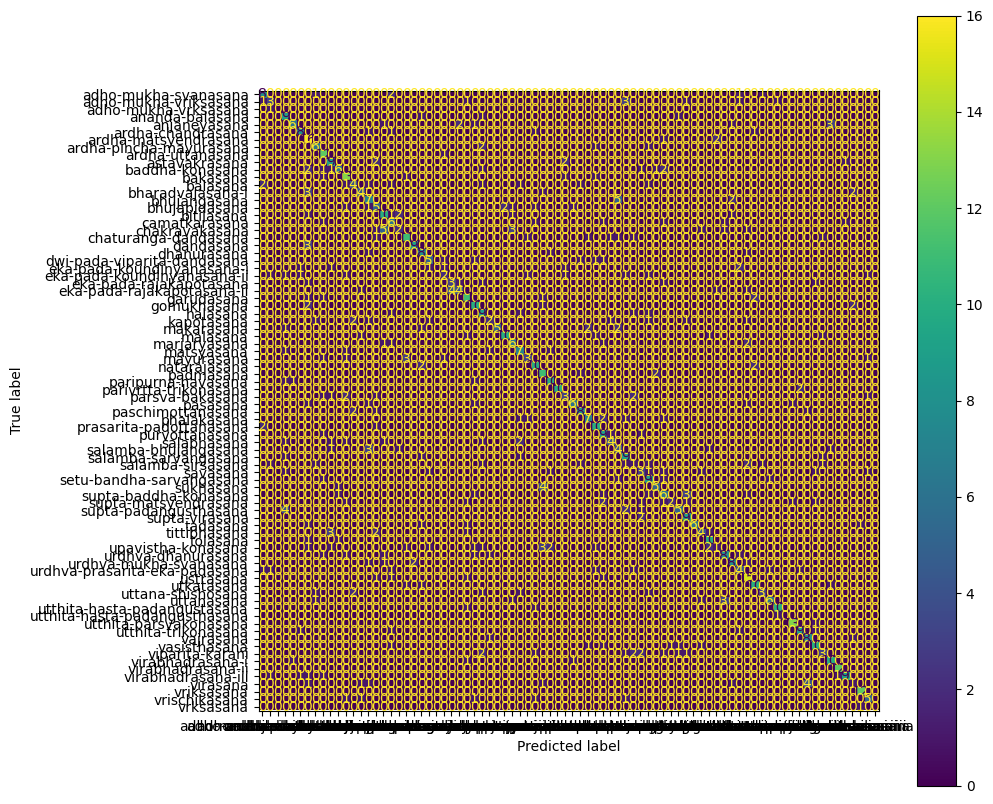

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
# ax.xaxis.tick_bottom.set_rotation(90)
# ax.get_legend().remove()
# ax.set_yticklabels(rotation=45)
disp.plot(ax=ax)

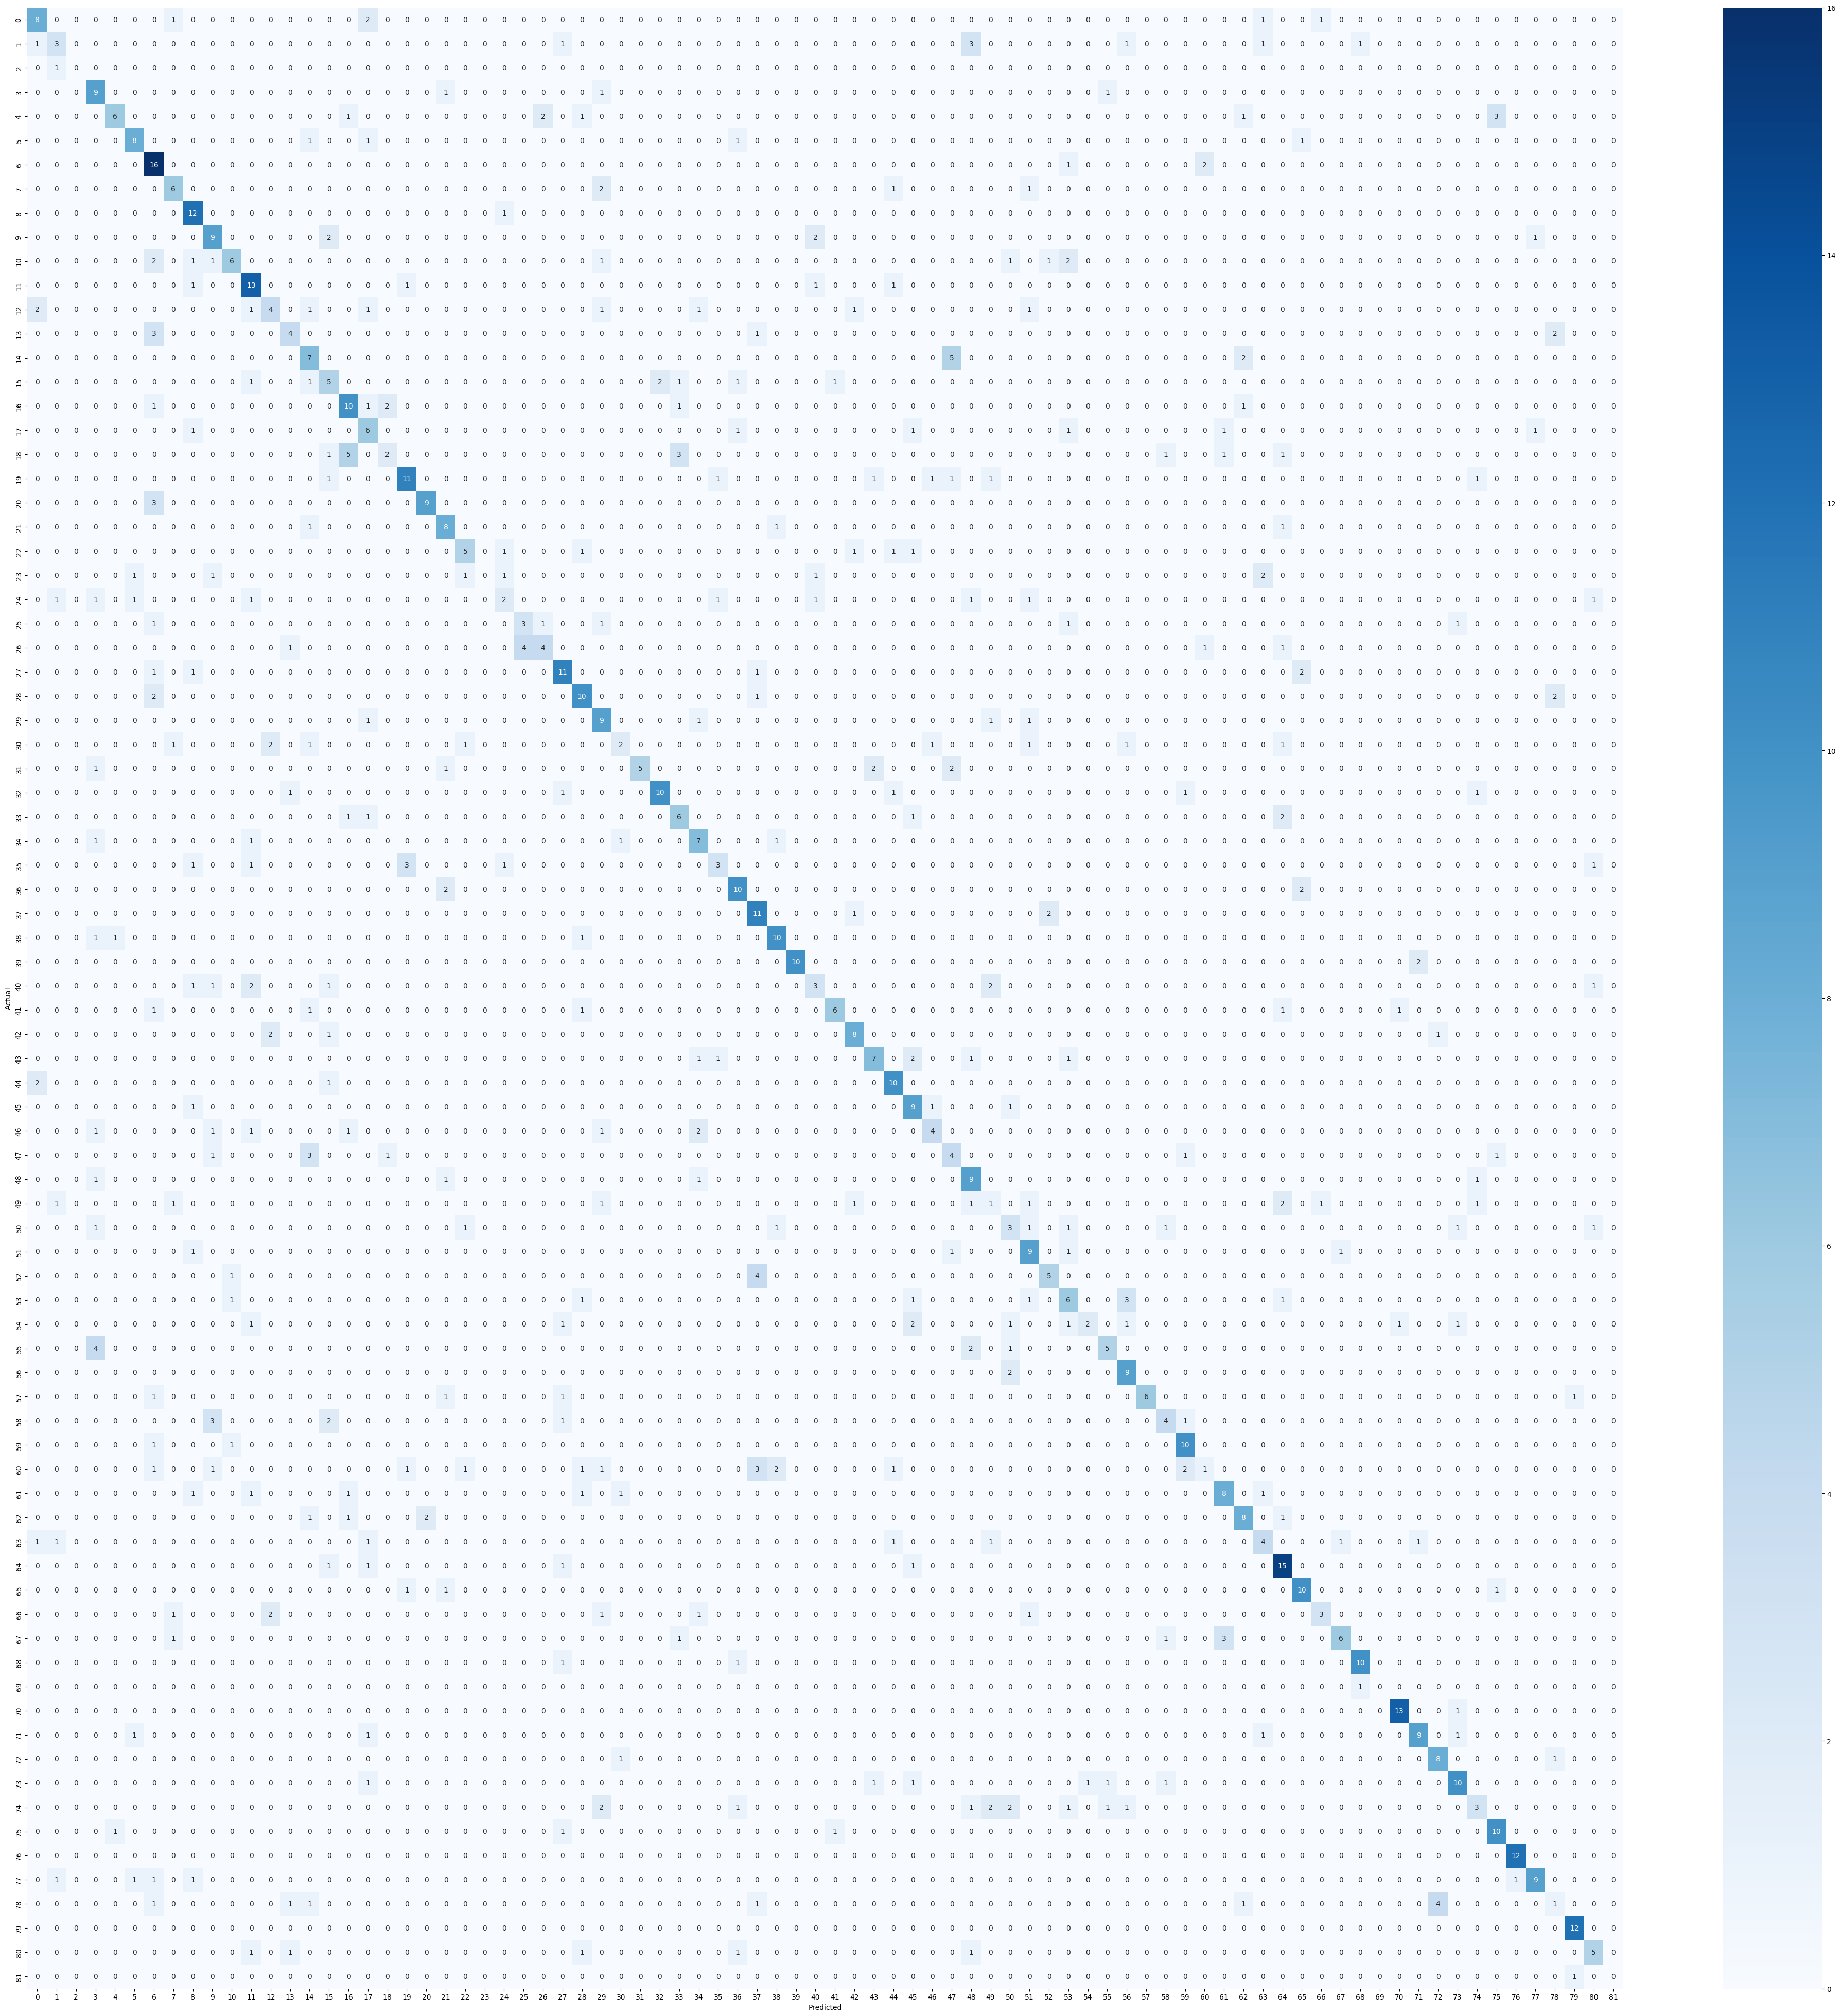

In [46]:
# plot confusion matrix
plt.figure(figsize=(50, 50), dpi=100)
sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels, labels=labels), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# view classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# view feature importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

# plot feature importances
importances.plot.bar()

# save model
import pickle

pickle.dump(rf, open('model.pkl', 'wb'))

# load model
model = pickle.load(open('model.pkl', 'rb'))